In [1]:
# Visualise the distributions of the labels in the dataset
import torch
import sys
import os
import pandas as pd
import numpy as np

sys.path.append('..')
from data import make_dataset, make_dataloader
from models import make_model
from config import cfg


In [2]:
#  read dataset
cfg.DATA.PATH = "../dataset/FPE/S1/p3"
cfg.DATA.EXP_SETUP = "exp0"
cfg.DATA.SEGMENT_LENGTH = 200
cfg.DATA.STRIDE = 100

dataset = make_dataset(cfg)

Loading saved dataset from ../dataset/FPE/S1/p3/dataset_segment_200_stride_100.pth
Number of training examples: 516
Testing on rep 1
Number of validation examples: 62
Number of test examples: 62


In [3]:
dataset['train'].dataset.label.shape

torch.Size([1269, 80])

In [4]:
cfg.DATA.LABEL_COLUMNS

['Thumb_Metacarpal_rotation_z',
 'Thumb_Metacarpal_rotation_x',
 'Thumb_Metacarpal_rotation_y',
 'Thumb_Metacarpal_rotation_w',
 'Thumb_Proximal_rotation_z',
 'Thumb_Proximal_rotation_x',
 'Thumb_Proximal_rotation_y',
 'Thumb_Proximal_rotation_w',
 'Thumb_Intermediate_rotation_z',
 'Thumb_Intermediate_rotation_x',
 'Thumb_Intermediate_rotation_y',
 'Thumb_Intermediate_rotation_w',
 'Thumb_Distal_rotation_z',
 'Thumb_Distal_rotation_x',
 'Thumb_Distal_rotation_y',
 'Thumb_Distal_rotation_w',
 'Index_Metacarpal_rotation_z',
 'Index_Metacarpal_rotation_x',
 'Index_Metacarpal_rotation_y',
 'Index_Metacarpal_rotation_w',
 'Index_Proximal_rotation_z',
 'Index_Proximal_rotation_x',
 'Index_Proximal_rotation_y',
 'Index_Proximal_rotation_w',
 'Index_Intermediate_rotation_z',
 'Index_Intermediate_rotation_x',
 'Index_Intermediate_rotation_y',
 'Index_Intermediate_rotation_w',
 'Index_Distal_rotation_z',
 'Index_Distal_rotation_x',
 'Index_Distal_rotation_y',
 'Index_Distal_rotation_w',
 'Middle

In [5]:
train_data = pd.DataFrame(dataset['train'].dataset.label, columns=cfg.DATA.LABEL_COLUMNS)
# to_view = [i for i in train_data.columns if 'rotation_w' in i]
# train_data = train_data[to_view]

In [6]:
train_data.describe()

,Thumb_Metacarpal_rotation_z,Thumb_Metacarpal_rotation_x,Thumb_Metacarpal_rotation_y,Thumb_Metacarpal_rotation_w,Thumb_Proximal_rotation_z,Thumb_Proximal_rotation_x,Thumb_Proximal_rotation_y,Thumb_Proximal_rotation_w,Thumb_Intermediate_rotation_z,Thumb_Intermediate_rotation_x,...,Pinky_Proximal_rotation_y,Pinky_Proximal_rotation_w,Pinky_Intermediate_rotation_z,Pinky_Intermediate_rotation_x,Pinky_Intermediate_rotation_y,Pinky_Intermediate_rotation_w,Pinky_Distal_rotation_z,Pinky_Distal_rotation_x,Pinky_Distal_rotation_y,Pinky_Distal_rotation_w
count,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,...,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000
mean,-26.682144,-36.240044,-40.464897,-0.721611,-69.615578,-88.386871,-78.593452,-47.903809,-23.067621,-49.271385,...,-92.725571,-47.263283,-51.746120,-25.283726,-56.700970,-39.375206,-52.871830,-14.517660,-60.466053,-34.228134
std,3.307576,3.393538,2.124612,1.877153,3.522460,6.774129,6.526497,2.582898,3.803727,7.518919,...,6.628081,5.385961,11.906178,35.302593,9.284844,32.230667,9.075343,30.155436,8.264970,24.465435
min,-40.317253,-47.856388,-47.149628,-5.594765,-85.852158,-107.256813,-92.328934,-54.039810,-40.149387,-68.926895,...,-111.894150,-60.462387,-71.994171,-97.351311,-72.929726,-78.587471,-72.678192,-95.694649,-78.871971,-78.647079
25%,-29.060085,-38.173027,-41.620186,-2.104023,-72.101830,-92.658318,-83.514725,-49.539268,-25.578003,-54.847027,...,-95.014626,-51.838112,-64.965408,-52.665703,-62.968700,-66.318985,-63.634659,-47.310532,-65.515831,-48.389820
50%,-26.079214,-35.980618,-40.589176,-0.792220,-69.499077,-86.790771,-78.789757,-47.871010,-22.945650,-47.776291,...,-90.965477,-47.019691,-44.809704,0.196269,-60.076794,-60.550816,-50.390869,3.629235,-62.608353,-41.513748
75%,-23.958738,-33.424522,-39.430954,0.556063,-66.790451,-82.725609,-74.247543,-46.004158,-20.005665,-43.343639,...,-88.605042,-41.908718,-42.238029,3.707693,-51.839199,-1.009553,-47.445484,5.071685,-57.654846,-8.906280
max,-19.909441,-28.733562,-33.670254,5.946974,-61.996723,-74.469025,-62.346943,-41.133438,-15.224351,-32.998646,...,-79.425842,-39.771076,-25.174570,5.796187,-32.420860,5.630128,-31.107847,6.818223,-32.887100,5.585965


array([[<Axes: title={'center': 'Thumb_Metacarpal_rotation_z'}>,
        <Axes: title={'center': 'Thumb_Metacarpal_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Metacarpal_rotation_y'}>,
        <Axes: title={'center': 'Thumb_Metacarpal_rotation_w'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_z'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_y'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_w'}>,
        <Axes: title={'center': 'Thumb_Intermediate_rotation_z'}>],
       [<Axes: title={'center': 'Thumb_Intermediate_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Intermediate_rotation_y'}>,
        <Axes: title={'center': 'Thumb_Intermediate_rotation_w'}>,
        <Axes: title={'center': 'Thumb_Distal_rotation_z'}>,
        <Axes: title={'center': 'Thumb_Distal_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Distal_rotation_y'}>,
        <Axes: title={'center': 'Thu

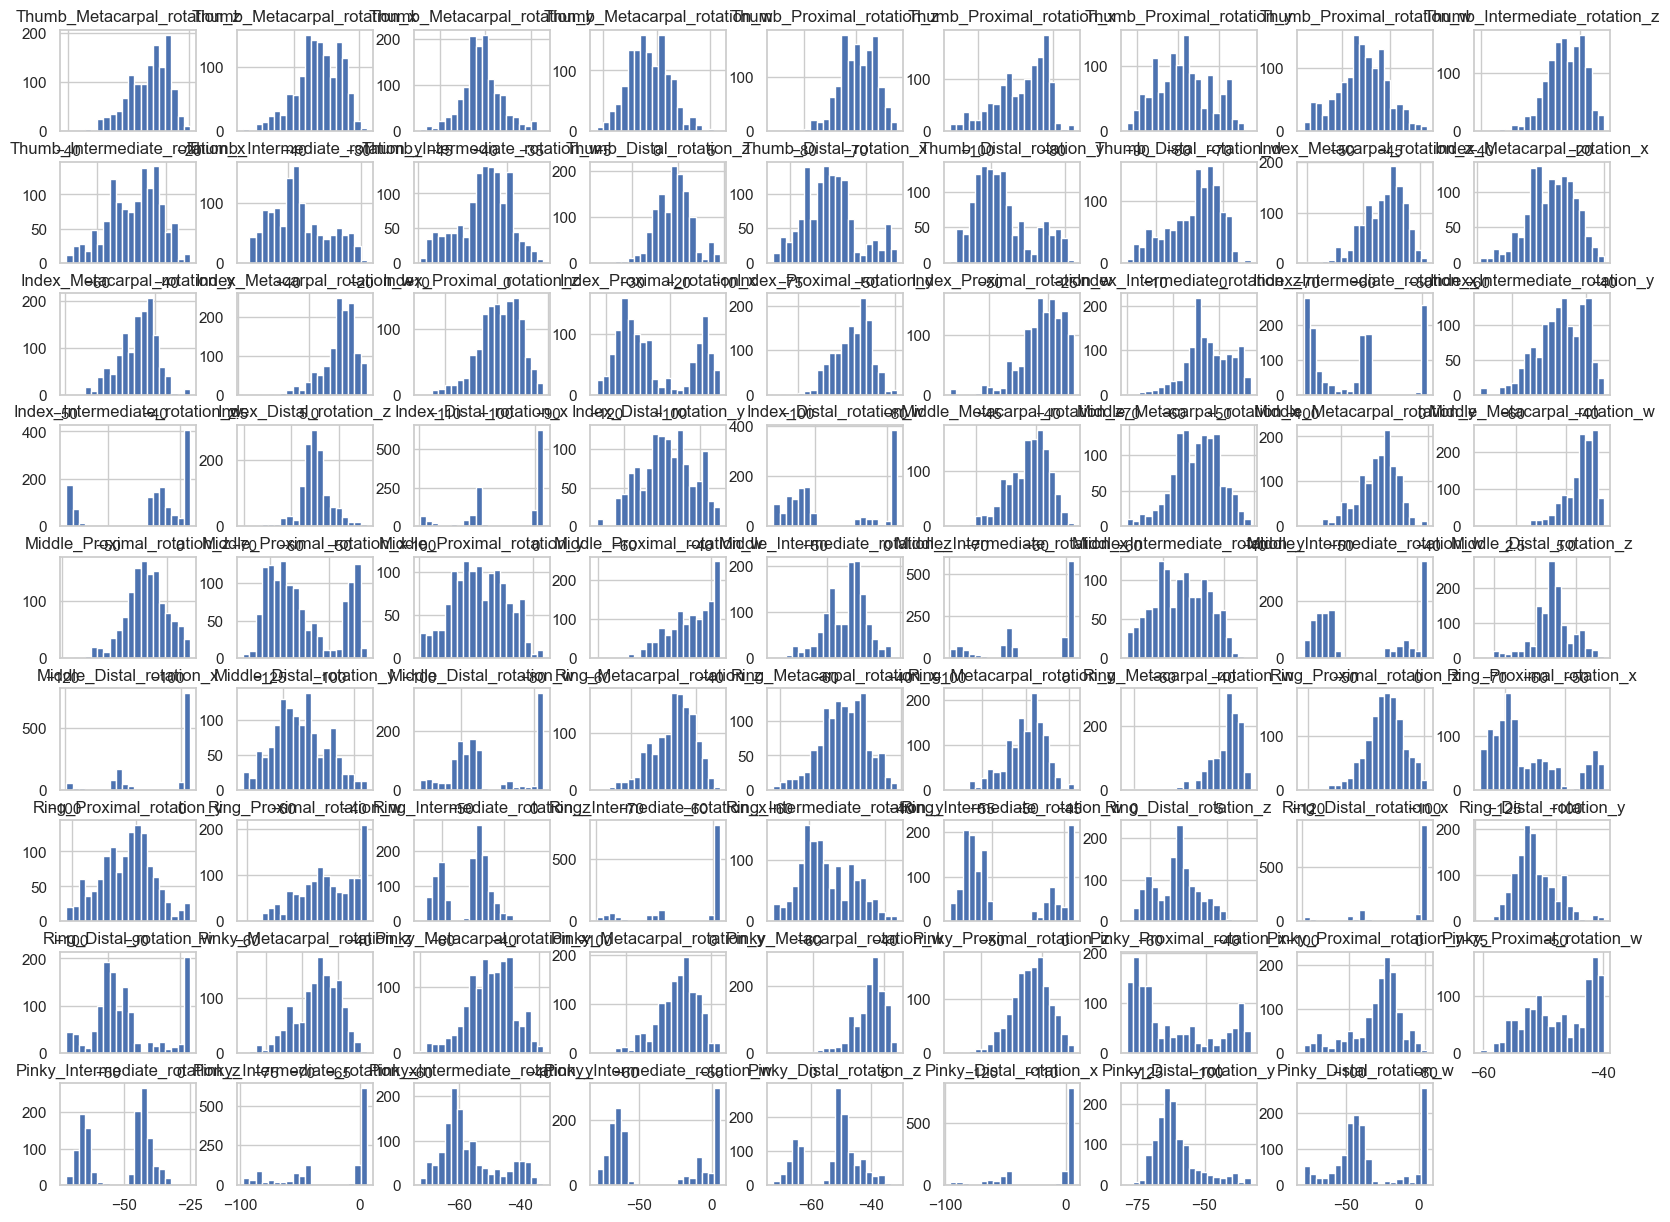

In [7]:
#  plot the histogram of the labels
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

train_data.hist(bins=20, figsize=(20, 15))

array([[<Axes: title={'center': 'Thumb_Metacarpal_rotation_z'}>,
        <Axes: title={'center': 'Thumb_Metacarpal_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Metacarpal_rotation_y'}>,
        <Axes: title={'center': 'Thumb_Metacarpal_rotation_w'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_z'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_y'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_w'}>,
        <Axes: title={'center': 'Thumb_Intermediate_rotation_z'}>],
       [<Axes: title={'center': 'Thumb_Intermediate_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Intermediate_rotation_y'}>,
        <Axes: title={'center': 'Thumb_Intermediate_rotation_w'}>,
        <Axes: title={'center': 'Thumb_Distal_rotation_z'}>,
        <Axes: title={'center': 'Thumb_Distal_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Distal_rotation_y'}>,
        <Axes: title={'center': 'Thu

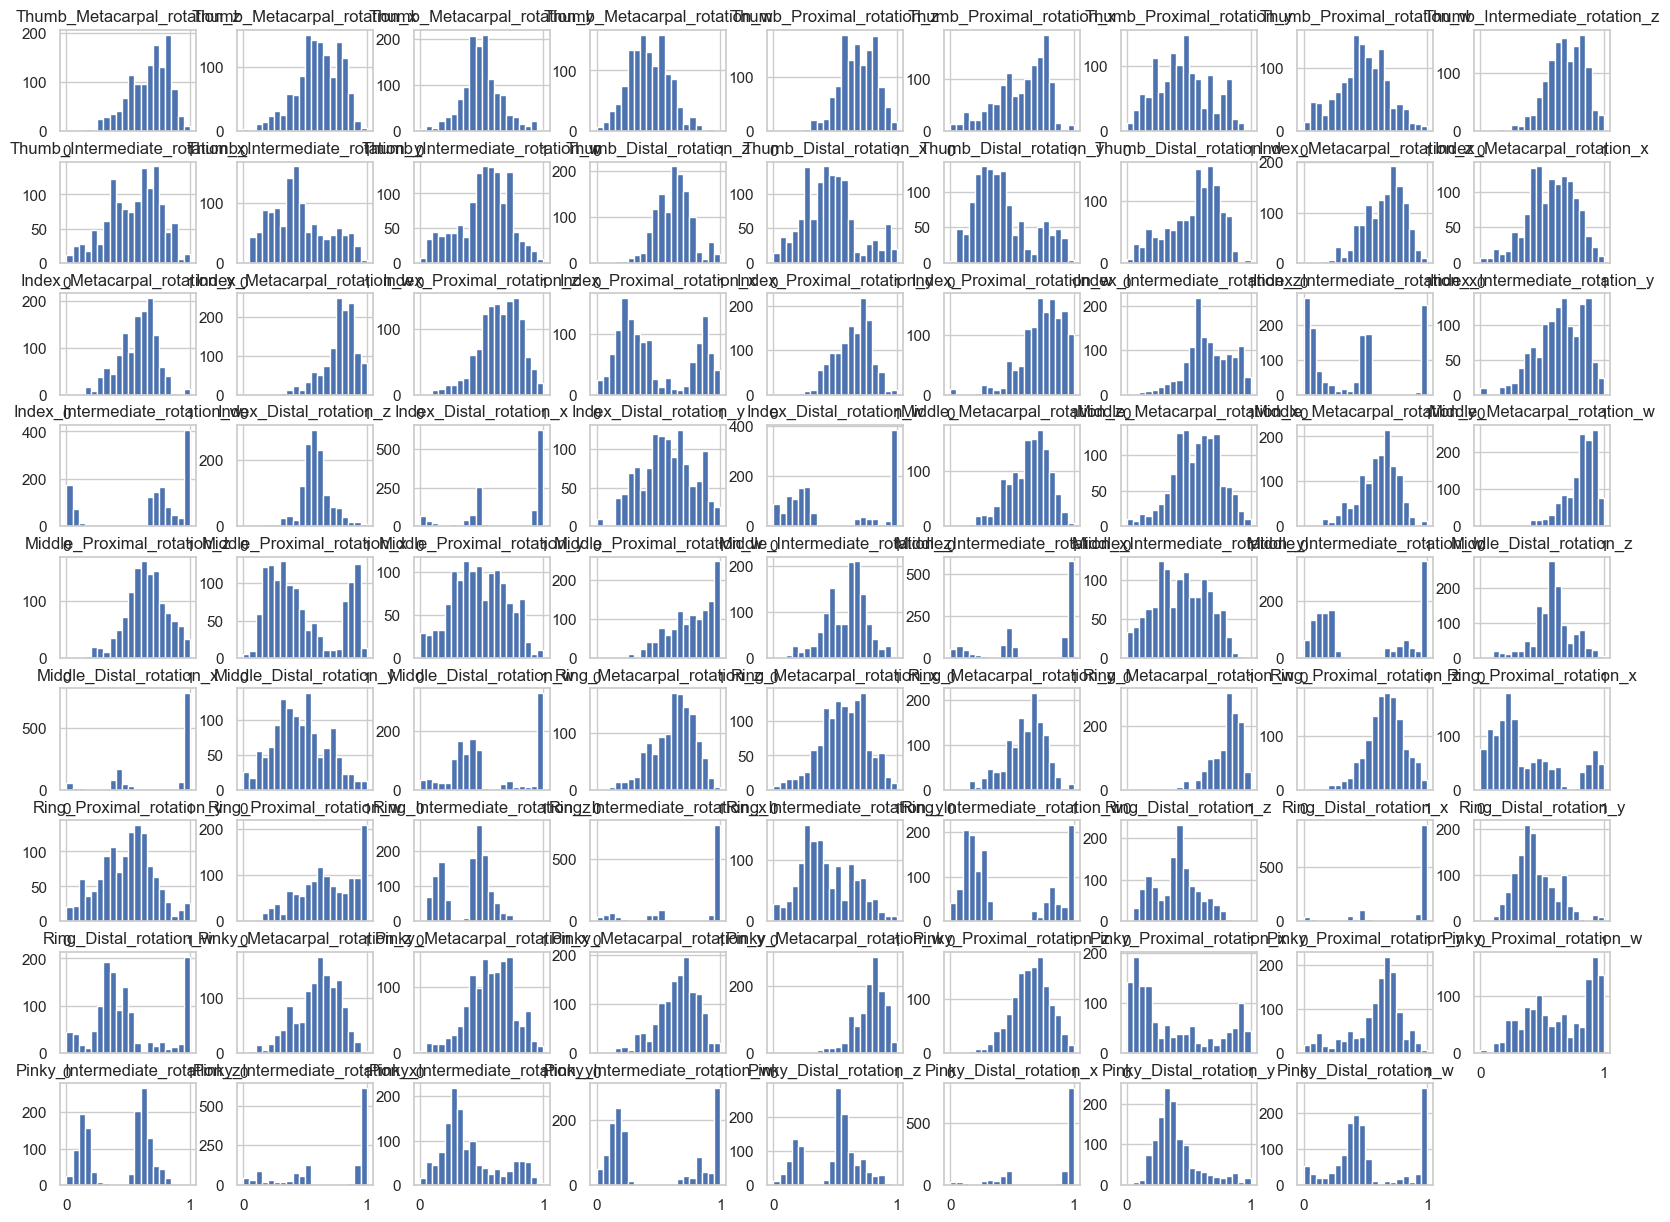

In [8]:
#  normalise and see distribution
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(train_data)
norm_data = pd.DataFrame(norm_data, columns = train_data.columns)
norm_data.hist(bins=20,figsize=(20,15))

In [10]:
import numpy as np
import pandas as pd

def compute_flexion_angles(bones_df):
    """
    Compute flexion angles from quaternion components in a DataFrame.

    Parameters:
    - bones_df (pd.DataFrame): DataFrame containing quaternion components for each bone,
      following the specified column naming convention.

    Returns:
    - pd.Series: Series containing flexion angles in degrees.
    """

    # Initialize an empty list to store flexion angles
    flexion_angles = []

    # Define the original Y-axis vector (upward direction)
    original_y_axis = np.array([0, 1, 0])

    for index, row in bones_df.iterrows():
        # Extract quaternion components for each bone
        quaternion_columns = [f"{finger}_{bone}_rotation_{coord}" for finger in ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky'] for bone in ['Proximal', 'Intermediate', 'Distal']
                              for coord in ['z', 'x', 'y', 'w']]
        quaternion_values = row[quaternion_columns]

        # Reshape the quaternion values to a 2D array and convert to a rotation matrix
        quaternion_matrix = np.array(quaternion_values).reshape(4, -1)
        rotation_matrix = np.array([
            [1 - 2 * quaternion_matrix[2, :] ** 2 - 2 * quaternion_matrix[3, :] ** 2,
             2 * quaternion_matrix[1, :] * quaternion_matrix[2, :] - 2 * quaternion_matrix[3, :] * quaternion_matrix[0, :],
             2 * quaternion_matrix[1, :] * quaternion_matrix[3, :] + 2 * quaternion_matrix[2, :] * quaternion_matrix[0, :]],
            [2 * quaternion_matrix[1, :] * quaternion_matrix[2, :] + 2 * quaternion_matrix[3, :] * quaternion_matrix[0, :],
             1 - 2 * quaternion_matrix[1, :] ** 2 - 2 * quaternion_matrix[3, :] ** 2,
             2 * quaternion_matrix[2, :] * quaternion_matrix[3, :] - 2 * quaternion_matrix[1, :] * quaternion_matrix[0, :]],
            [2 * quaternion_matrix[1, :] * quaternion_matrix[3, :] - 2 * quaternion_matrix[2, :] * quaternion_matrix[0, :],
             2 * quaternion_matrix[2, :] * quaternion_matrix[3, :] + 2 * quaternion_matrix[1, :] * quaternion_matrix[0, :],
             1 - 2 * quaternion_matrix[1, :] ** 2 - 2 * quaternion_matrix[2, :] ** 2]
        ])

        # Extract the rotated Y-axis vector
        rotated_y_axis = rotation_matrix[:, 1]

        # Compute the flexion angle in radians
        flexion_angle = np.arccos(np.dot(original_y_axis, rotated_y_axis))

        # Convert the angle to degrees and append to the list
        flexion_angles.append(np.degrees(flexion_angle))

    # Create a Series from the list of flexion angles
    flexion_series = pd.Series(flexion_angles, name='Flexion_Angle_Degrees')

    return flexion_series

# Example usage:
# Assuming 'df' is your DataFrame with quaternion components
flexion_angles = compute_flexion_angles(train_data)
df_with_flexion = pd.concat([train_data, flexion_angles], axis=1)


/var/folders/kl/j_5px5k97039f8mqf1tztckw0000gn/T/ipykernel_90866/2139238860.py:46: RuntimeWarning: invalid value encountered in arccos
  flexion_angle = np.arccos(np.dot(original_y_axis, rotated_y_axis))
/var/folders/kl/j_5px5k97039f8mqf1tztckw0000gn/T/ipykernel_90866/2139238860.py:46: RuntimeWarning: invalid value encountered in arccos
  flexion_angle = np.arccos(np.dot(original_y_axis, rotated_y_axis))
/var/folders/kl/j_5px5k97039f8mqf1tztckw0000gn/T/ipykernel_90866/2139238860.py:46: RuntimeWarning: invalid value encountered in arccos
  flexion_angle = np.arccos(np.dot(original_y_axis, rotated_y_axis))
/var/folders/kl/j_5px5k97039f8mqf1tztckw0000gn/T/ipykernel_90866/2139238860.py:46: RuntimeWarning: invalid value encountered in arccos
  flexion_angle = np.arccos(np.dot(original_y_axis, rotated_y_axis))
/var/folders/kl/j_5px5k97039f8mqf1tztckw0000gn/T/ipykernel_90866/2139238860.py:46: RuntimeWarning: invalid value encountered in arccos
  flexion_angle = np.arccos(np.dot(original_y_axi

array([[<Axes: title={'center': 'Thumb_Metacarpal_rotation_z'}>,
        <Axes: title={'center': 'Thumb_Metacarpal_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Metacarpal_rotation_y'}>,
        <Axes: title={'center': 'Thumb_Metacarpal_rotation_w'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_z'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_y'}>,
        <Axes: title={'center': 'Thumb_Proximal_rotation_w'}>,
        <Axes: title={'center': 'Thumb_Intermediate_rotation_z'}>],
       [<Axes: title={'center': 'Thumb_Intermediate_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Intermediate_rotation_y'}>,
        <Axes: title={'center': 'Thumb_Intermediate_rotation_w'}>,
        <Axes: title={'center': 'Thumb_Distal_rotation_z'}>,
        <Axes: title={'center': 'Thumb_Distal_rotation_x'}>,
        <Axes: title={'center': 'Thumb_Distal_rotation_y'}>,
        <Axes: title={'center': 'Thu

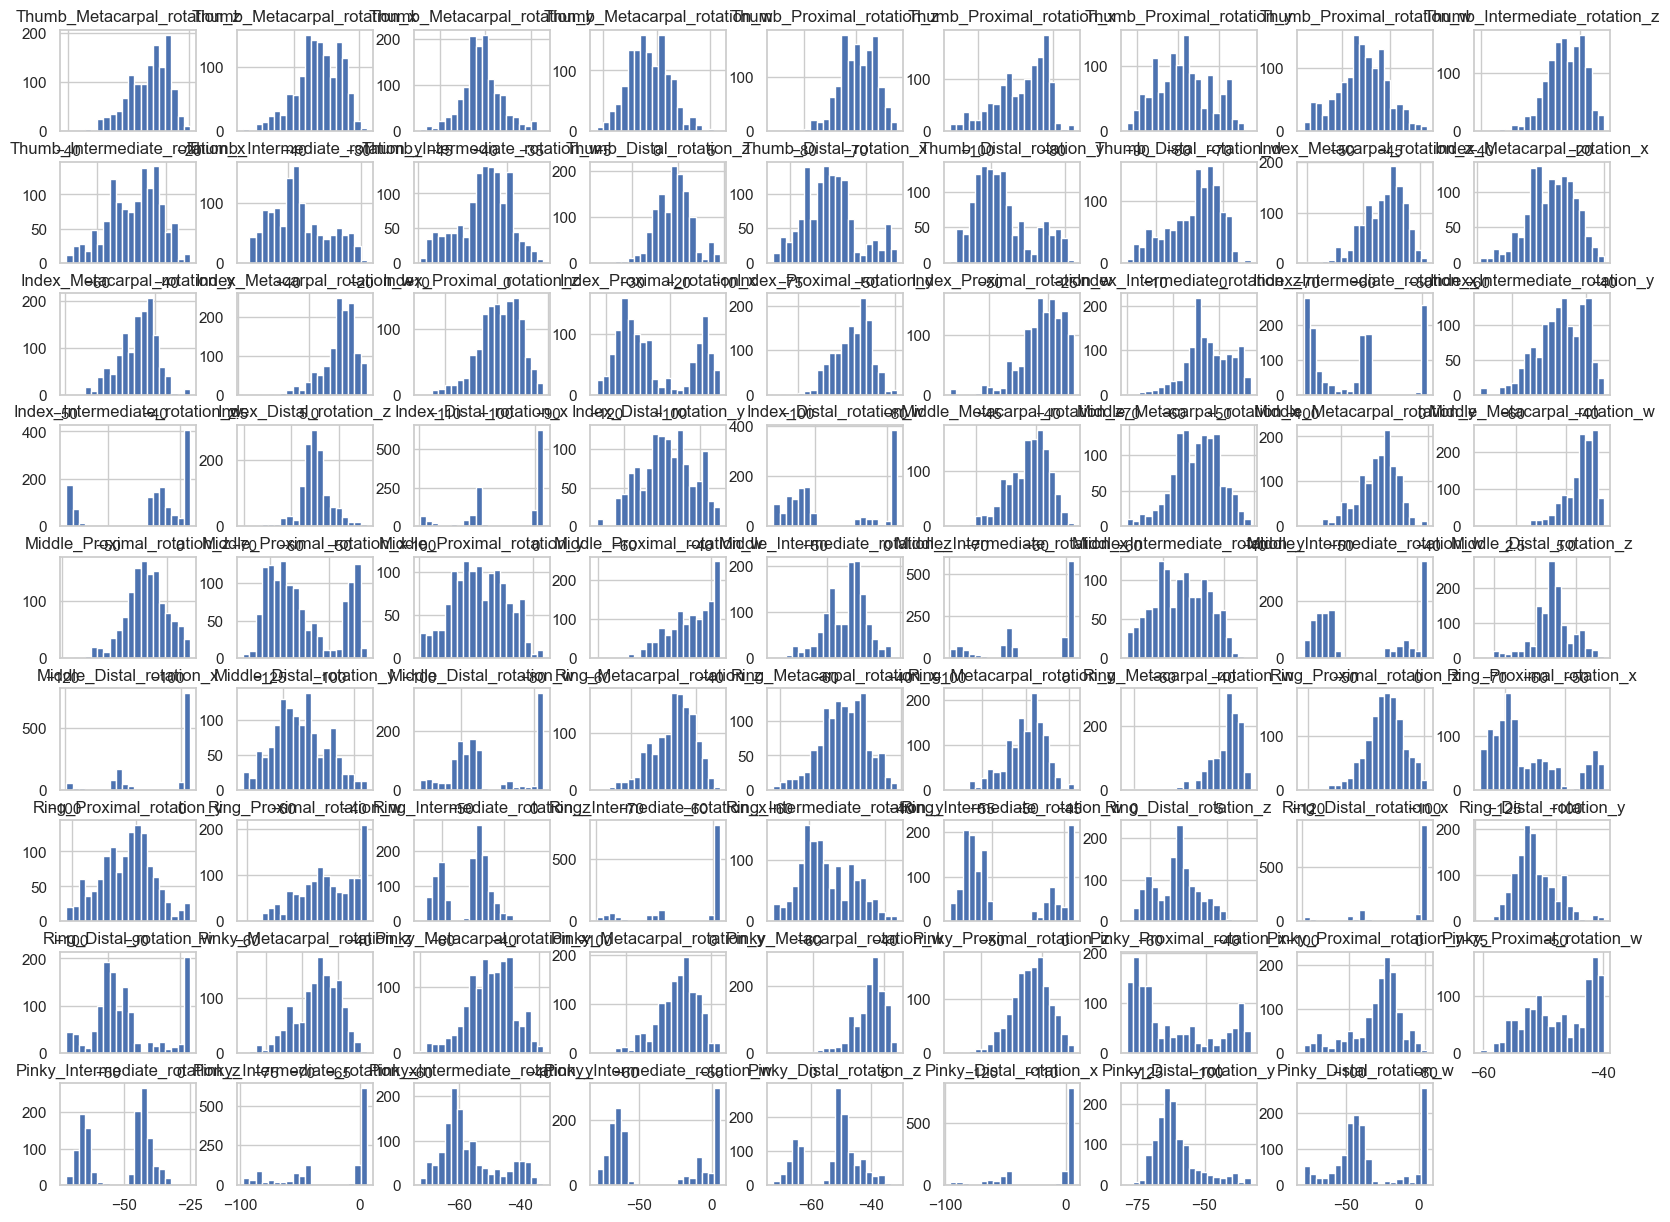

In [11]:
df_with_flexion.hist(bins=20,figsize=(20,15))

In [22]:
df_with_flexion['Flexion_Angle_Degrees'].value_counts() 

Flexion_Angle_Degrees
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]    1
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]    1
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]    1
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]    1
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]    1
                                                                              ..
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]    1
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]    1
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]    1
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]    1
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]    1
Name: count, Length: 1269, dtype: int64